# Digit Detection Model

This notebook can be used to train a CNN using the `images-augmented` images created with the `Image-Data-Augmentation.ipynb` notebook (or actually any other dataset).

In [1]:
from datetime import datetime

import numpy as np
import pandas as pd
import cv2
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import keras

from sklearn.model_selection import  train_test_split
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical

%load_ext tensorboard

Using TensorFlow backend.


In [2]:
from pathlib import Path

ROOT_DIR = Path().absolute().parent 
TEST_IMAGES_BASE = ROOT_DIR / "images-augmented"

DATASET_PATH = TEST_IMAGES_BASE / "dataset.csv"

TENSORBOARD_LOGDIR = ROOT_DIR / "logs" / datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=TENSORBOARD_LOGDIR)

In [3]:
df = pd.read_csv(DATASET_PATH, index_col=0)
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,6,5,4,5,5,6,7,8,9,11,...,81,78,77,74,73,63,54,54,54,54
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,8,8,29,46,54,54,56,58,60,63,...,58,58,62,62,57,52,46,36,37,41
3,4,29,31,31,33,37,40,41,44,45,...,54,54,52,50,52,51,48,47,48,49
4,8,34,38,39,38,36,33,32,35,38,...,18,18,17,16,17,17,15,18,20,20


In [4]:
y_train = df['label']
X_train = df.drop(labels=['label'], axis=1)

In [5]:
df.shape

(152961, 785)

## Split train and test data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.4)

In [7]:
X_train.shape, X_test.shape

((91776, 784), (61185, 784))

In [8]:
y_train.shape, y_test.shape

((91776,), (61185,))

## Normalize Pixel values

In [9]:
X_train = X_train / 255.0
X_train = X_train.values.reshape(-1, 28, 28, 1)

X_test = X_test / 255.0
X_test = X_test.values.reshape(-1, 28, 28, 1)

X_train.shape, X_test.shape

((91776, 28, 28, 1), (61185, 28, 28, 1))

## Data distribution

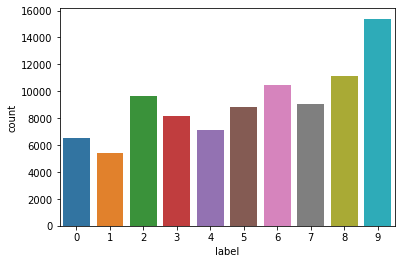

In [10]:
sns.countplot(y_train)

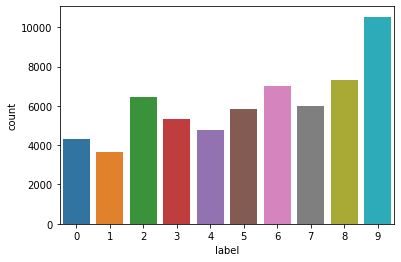

In [11]:
sns.countplot(y_test)

## One-Hot Encode train data

In [12]:
y_train = to_categorical(y_train, num_classes=10)
y_train.shape

(91776, 10)

## One-Hot Encode test data

In [13]:
y_test = to_categorical(y_test, num_classes=10)
y_test.shape

(61185, 10)

## Split test to test and validation

In [14]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [15]:
X_test.shape, X_val.shape

((30592, 28, 28, 1), (30593, 28, 28, 1))

In [16]:
y_test.shape, y_val.shape

((30592, 10), (30593, 10))

## Build the model

In [17]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation = 'softmax'))

model.summary()

W0703 21:42:10.415472 140601110763328 deprecation_wrapper.py:119] From /opt/conda/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0703 21:42:10.416951 140601110763328 deprecation_wrapper.py:119] From /opt/conda/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0703 21:42:10.419375 140601110763328 deprecation_wrapper.py:119] From /opt/conda/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0703 21:42:10.429959 140601110763328 deprecation_wrapper.py:119] From /opt/conda/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0703 21:42:10.431609 140601110763328 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
__________

In [18]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

W0703 21:42:10.519564 140601110763328 deprecation_wrapper.py:119] From /opt/conda/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0703 21:42:10.535174 140601110763328 deprecation_wrapper.py:119] From /opt/conda/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [19]:
history = model.fit(
    X_train, y_train, 
    epochs=20, batch_size=128, 
    validation_data=(X_val, y_val), 
    verbose=2, callbacks=[tensorboard_callback]
)

W0703 21:42:10.610778 140601110763328 deprecation.py:323] From /opt/conda/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0703 21:42:10.985377 140601110763328 deprecation_wrapper.py:119] From /opt/conda/lib/python3.7/site-packages/keras/callbacks.py:850: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.

W0703 21:42:10.986006 140601110763328 deprecation_wrapper.py:119] From /opt/conda/lib/python3.7/site-packages/keras/callbacks.py:853: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.



Train on 91776 samples, validate on 30593 samples
Epoch 1/20
 - 34s - loss: 0.7776 - acc: 0.7342 - val_loss: 0.0920 - val_acc: 0.9786
Epoch 2/20
 - 33s - loss: 0.1256 - acc: 0.9623 - val_loss: 0.0231 - val_acc: 0.9958
Epoch 3/20
 - 33s - loss: 0.0598 - acc: 0.9835 - val_loss: 0.0101 - val_acc: 0.9978
Epoch 4/20
 - 33s - loss: 0.0377 - acc: 0.9896 - val_loss: 0.0062 - val_acc: 0.9988
Epoch 5/20
 - 33s - loss: 0.0299 - acc: 0.9917 - val_loss: 0.0063 - val_acc: 0.9985
Epoch 6/20
 - 33s - loss: 0.0245 - acc: 0.9935 - val_loss: 0.0039 - val_acc: 0.9988
Epoch 7/20
 - 33s - loss: 0.0244 - acc: 0.9934 - val_loss: 0.0046 - val_acc: 0.9987
Epoch 8/20
 - 34s - loss: 0.0244 - acc: 0.9938 - val_loss: 0.0037 - val_acc: 0.9987
Epoch 9/20
 - 34s - loss: 0.0252 - acc: 0.9933 - val_loss: 0.0034 - val_acc: 0.9988
Epoch 10/20
 - 35s - loss: 0.0243 - acc: 0.9941 - val_loss: 0.0033 - val_acc: 0.9988
Epoch 11/20
 - 35s - loss: 0.0248 - acc: 0.9944 - val_loss: 0.0041 - val_acc: 0.9987
Epoch 12/20
 - 35s - los

## Training Loss and Acc

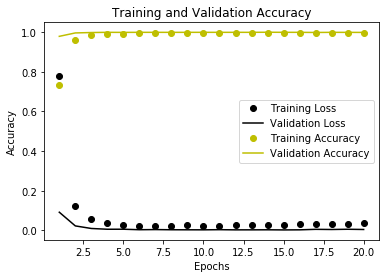

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = list(range(1, 21))

plt.plot(epochs, loss, 'ko', label='Training Loss')
plt.plot(epochs, val_loss, 'k', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.plot(epochs, acc, 'yo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'y', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

## Evaluate

In [21]:
evaluation = model.evaluate(X_test, y_test)
print(evaluation)

30592/30592 [==============================] - 3s 108us/step
[0.00535782413460629, 0.9981694560669456]


## Predictions

In [22]:
import random
import time

EVAL_IMAGES = list(TEST_IMAGES_BASE.iterdir())
random.shuffle(EVAL_IMAGES)
RANDOM_EVAL_IMAGES = EVAL_IMAGES[:5]

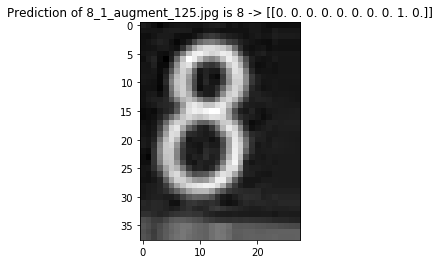

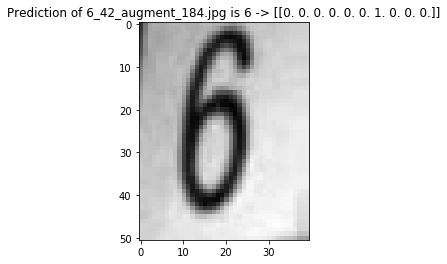

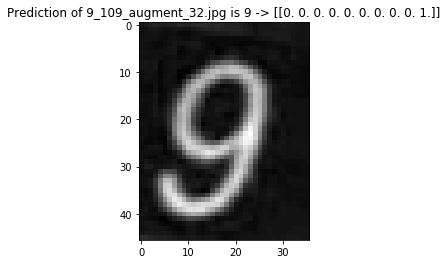

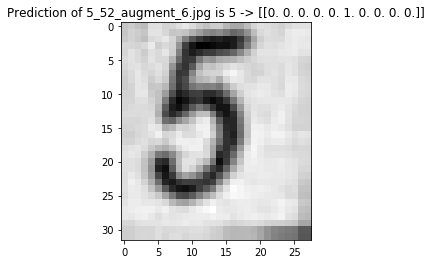

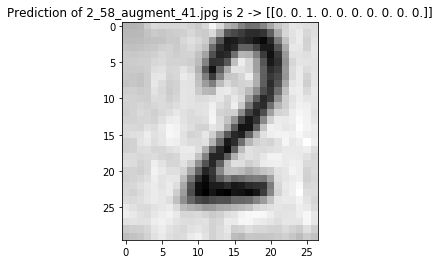

In [23]:
for random_image in RANDOM_EVAL_IMAGES:
    image = cv2.imread(str(random_image), 0)
    vectorized_image = cv2.resize(image, (28, 28)).reshape(1, 28, 28, 1)
    
    predictions = model.predict(vectorized_image)
    prediction = np.argmax(predictions)
    
    plt.title("Prediction of {} is {} -> {}".format(random_image.name, prediction, predictions))
    plt.imshow(image, cmap="gray")
    plt.show()

## Save Model

In [24]:
model.save(str(ROOT_DIR / "models" / "digit-detection.h5"))

In [25]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 160), started 0:17:14 ago. (Use '!kill 160' to kill it.)